# Plotting Hyperparameter Search

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [2]:
params = ['max_depth', 'min_samples_leaf', 'min_samples_split']
param_labels = {'max_depth':'Max Depth',
                'min_samples_leaf':'Min Samples Leaf',
                'min_samples_split':'Min Samples Split',
                'snr':'Signal-Noise Ratio, $\dfrac{S}{\sqrt{S+B}}$'}
res = pd.read_pickle("Hyperparameters_BTC.pkl")

In [3]:
res = res[['rank_test_score', 'mean_test_score', 'std_test_score', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split']].reset_index(drop=True)
res.rename(columns={'rank_test_score': 'score_rank', 'mean_test_score': 'mean_score', 'std_test_score':'std_score',
                    'param_max_depth':'max_depth', 'param_min_samples_leaf':'min_samples_leaf', 'param_min_samples_split':'min_samples_split'}, inplace=True)

In [4]:
res.sort_values('score_rank').head(3).append(res.sort_values('score_rank').tail(3))
best_points = res.iloc[res['mean_score'].argmax()]
best_points = {param:best_points[[param]].values for param in params}
best_points

C:\Users\Student\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  


{'max_depth': array([12.0], dtype=object),
 'min_samples_leaf': array([0.0], dtype=object),
 'min_samples_split': array([800.0], dtype=object)}

## 3D Plot of Grid Search

IMPORT - analysis.plotting cut 1
IMPORT - analysis.plotting cut 2
IMPORT - analysis.plotting cut 3
IMPORT - analysis.plotting cut 4
IMPORT - analysis.plotting cut 5
IMPORT - analysis.plotting cut 6
IMPORT - analysis.plotting cut 7
IMPORT - analysis.plotting cut 8
IMPORT - analysis.plotting cut 9


C:\Users\Student\AppData\Roaming\Python\Python37\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


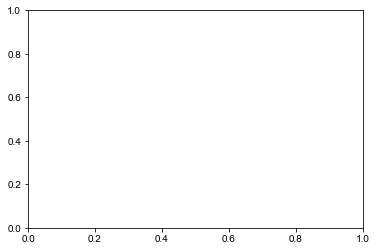

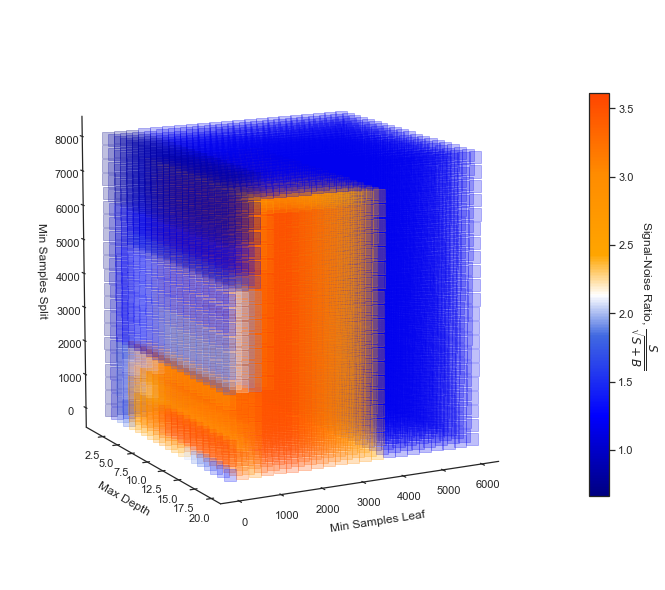

In [ ]:
%matplotlib inline
import matplotlib.cm as cmx
import matplotlib.colors as pltcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import analysis.plotting as AP
sns.set(style="white")  # Sets all seaborn plot backgrounds to white.


fig3d = plt.figure(figsize=(9.5,8))
ax3d = Axes3D(fig3d)

xs, ys, zs = res[params].values.T
cs = res[['mean_score']].values.T[0]

cm = AP.std_cmap
cNorm = pltcolors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

ax3d.scatter(xs, ys, zs, c=scalarMap.to_rgba(cs), marker='s', s=150, alpha=0.25)
scalarMap.set_array(cs)

ax3d.set_xlabel(param_labels[params[0]], labelpad=7)
ax3d.set_ylabel(param_labels[params[1]], labelpad=7)
ax3d.set_zlabel(param_labels[params[2]], labelpad=10)


colorbar = fig3d.colorbar(scalarMap, shrink=0.7)
colorbar.set_label(param_labels['snr'], rotation=270, labelpad=25)

ax3d.grid(b=False)
ax3d.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax3d.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax3d.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

tmp_planes = ax3d.zaxis._PLANES 
ax3d.zaxis._PLANES = (tmp_planes[2], tmp_planes[3], 
                      tmp_planes[0], tmp_planes[1], 
                      tmp_planes[4], tmp_planes[5])

view_2 = (25, -45) # view_1 = (25, -135)
init_view = view_2
ax3d.view_init(*init_view)

ax3d.view_init(azim=332, elev=12)
fig3d.patch.set_facecolor('None')
ax3d.patch.set_facecolor('None')
fig3d.show()

## Plotting Projecting Maximum for Each Plane and Plotting

In [6]:
param_array = []
rows, columns = [], []
for n, param1 in enumerate(params):
    param_row = []
    for m, param2 in enumerate(params):
        if m < n:
            param_row.append((param1, param2))
            if param1 not in rows:
                rows.append(param1)
            if param2 not in columns:
                columns.append(param2)
        elif m < len(params) - 1:
            param_row.append(None)
    if n > 0:
        param_array.append(param_row)
print(rows, columns)
print(param_array)

['min_samples_leaf', 'min_samples_split'] ['max_depth', 'min_samples_leaf']
[[('min_samples_leaf', 'max_depth'), None], [('min_samples_split', 'max_depth'), ('min_samples_split', 'min_samples_leaf')]]


In [9]:
from matplotlib.ticker import MaxNLocator

<IPython.core.display.Javascript object>


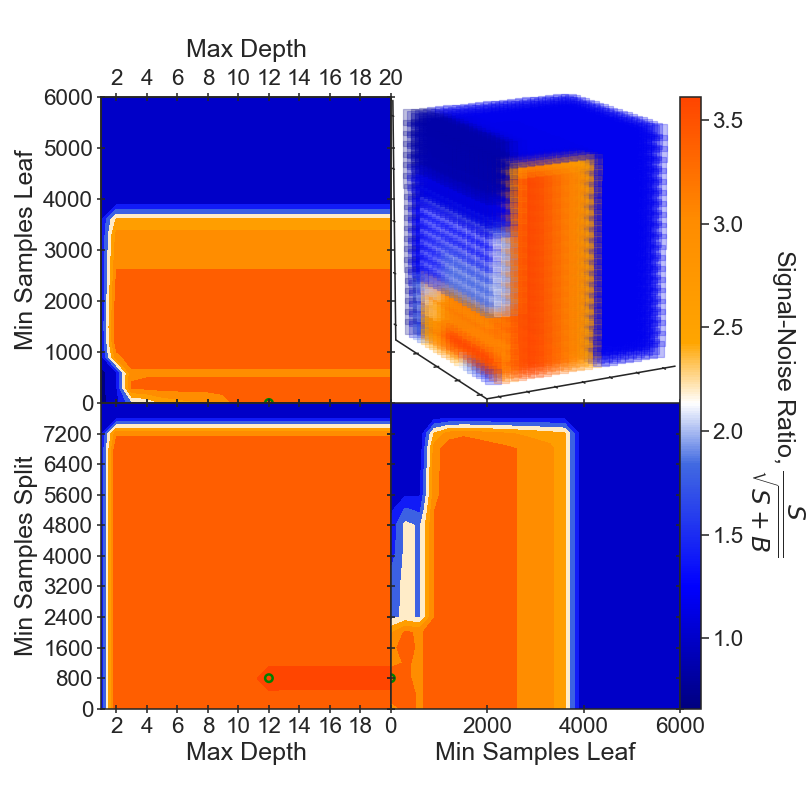

In [12]:
%matplotlib notebook

fontsize = 20
labelsize  = 18

# Set hyperparameter-plane projection function
proj_fn = lambda df: df.max()

# Create figure with correct number of subplots
fig, axes = plt.subplots(figsize=(9,9),
                         nrows=len(rows), ncols=len(columns),
                         gridspec_kw={'wspace':0, 'hspace':0})

# Set extreme values for global min/max of projected scores
min_c, max_c = float('inf'), 0.0
# Iterate over each hyperparamater surface
for row in param_array:
    for element in row:
        
        # If parameter surface is empty skip to next axis
        if element is None:
            continue
        
        # Apply function to project down to the element[1]-element[0] plane
        plane_series = proj_fn(res.groupby(list(element))['mean_score'])
        plane_series = plane_series.values  # Get values of plane
        
        # Find plane's minimum/maximum projected scores
        plane_min, plane_max = min(plane_series), max(plane_series)
        
        # If plane's min/max is smaller/greater than
        # current global min/max use plane's min/max
        min_c = min_c if plane_min > min_c else plane_min
        max_c = max_c if plane_max < max_c else plane_max

# Create standard colormap for all contour plots
cm = AP.std_cmap
cNorm = pltcolors.Normalize(vmin=min_c, vmax=max_c)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
scalarMap.set_array(cs)

# Iterate over each hyperparamater surface
for n, row in enumerate(param_array):
    for m, element in enumerate(row):
        ax = axes[n, m]
        
        # If empty skip to next surface
        if element is None:
            continue
        
        # Apply function to project down to the element[1]-element[0] plane
        max_res = proj_fn(res.groupby(list(element))['mean_score']).reset_index()
        # Obtain plane coordinaces (xs, ys) and projected score values (cs)
        ys, xs, cs = max_res.values.T
        
        # Cuts repeating values of plane coordinates
        xs, ys = sorted(set(xs)), sorted(set(ys))
        # Reshape projected scores to map to plane coordinates
        cs = cs.reshape((len(ys), len(xs)))
        
        # Plot projected score as contours on the plane
        ax.contourf(xs, ys, cs, vmin=min_c, vmax=max_c, cmap=AP.std_cmap)
        # Plot the best hyperparameter coordinates on the plane
        ax.scatter(best_points[element[1]], best_points[element[0]], marker='o',
                   facecolors='none', edgecolors='green', linewidth=2)
        scalarMap.set_array(cs)
        
        # Set the plane's limits
        ax.set_xlim(min(xs), max(xs))
        ax.set_ylim(min(ys), max(ys))

# Set axes labels, ticks and ticklabels
shape = axes.shape # Get plot grid's shape '(n_rows, n_cols)'
# Reverse iterate over each hyperparamater surface
for n, row in list(enumerate(param_array))[::-1]:
    # Iterate over rows from the bottom,
    # so tick positions can propogate upwards
    for m, element in enumerate(row):
        # Iterate over columns for the left,
        # so tick positions can propogate rightwards
        ax = axes[n, m]
        
        # Draw figures so ticks and labels can be obtained
        fig.canvas.draw()
        
        # If empty skip to next surface
        if element is None:
            ax._visible = False
            continue
        
        # Set standard tick parameters for each plot
        tick_dict = {'axis':'both', 'which':'major', 'direction':'inout',
                     'bottom':True, 'top':True, 'left':True, 'right':True,
                     'labelbottom':False, 'labeltop':False,
                     'labelleft':False, 'labelright':False,
                      'labelsize':labelsize}
        
        ## x-axes ##
        # Bottom Row Plots #
        if n == shape[0] - 1:
            # Add axis label and bottom ticklabels
            ax.set_xlabel(param_labels[element[1]], fontsize=fontsize)
            tick_dict['labelbottom'] = True
            
            # If rightmost (next to colorbar) cut largest ticklabel
            if m < shape[1] - 1:
                ax.xaxis.set_major_locator(MaxNLocator(prune='upper'))
        else:
            # Match x-ticks and x-ticklabels to plots below
            # by getting axis below's attributes
            ax_blw = axes[n+1,m]
            x0, x1 = ax_blw.viewLim._points[:,0]
            xticks_blw = list(ax_blw.get_xticks())
            xticklabels_blw = list(ax_blw.get_xticklabels())
            
            # If rightmost column (next to colorbar) remove upper tick
            if m < shape[1] - 1:
                xticks_blw += list(ax.get_xticks())[-1:]
                xticklabels_blw += list(ax.get_xticklabels())[-1:]
            
            # Remove any ticks outside of x-axis below's x-limits
            for tick, tlabel in zip(xticks_blw, xticklabels_blw):
                if not (x0 <= tick <= x1):
                    xticks_blw.remove(tick)
                    xticklabels_blw.remove(tlabel)
            
            # Set x-ticks, x-ticklabels and x-limits to match axis below
            ax.set_xticks(xticks_blw)
            ax.set_xticklabels(xticklabels_blw)
            ax.set_xlim(x0, x1)
        # Diagonal Row Plots #
#         if n == m:
        if (n == m) and (m != shape[1] - 1):
            # Match x-ticks and x-ticklabels on top axis to bottom axis
            # by creating a temporary x-axis for top ticks and labels
            tmp_ax = ax.twiny()
            tmp_dict = tick_dict.copy()
            tmp_dict.update({'bottom':False, 'top':False,
                             'left':False, 'right':False,
                             'labeltop':True})
            tmp_ax.tick_params(**tmp_dict)
            tmp_ax.set_axisbelow(False)
            
            # Get ticks and ticklabels for current x-axis
            tmp_ticks = list(ax.get_xticks())
            tmp_ticklabels = list(ax.get_xticklabels())
            
            # If not on first column ignore lower tick
            s = 0 if (m == 0) else 1
            # If on rightmost column (next to colorbar) ignore upper tick
            e = len(tmp_ticks) if not (m == shape[1] - 1) else -1
            
            # Set top-axis' labels, ticks and limits
            tmp_ax.set_xlabel(param_labels[element[1]], fontsize=fontsize, labelpad=10)
            tmp_ax.set_xticks(tmp_ticks[s:e])
            tmp_ax.set_xticklabels(tmp_ticklabels[s:e])
            tmp_ax.set_xlim(ax.viewLim._points[:,0])
        
        ## y-axes ##
        # Fist Column Plots #
        if m == 0:
            # Add axis label and left ticklabels
            ax.set_ylabel(param_labels[element[0]], fontsize=fontsize)
            tick_dict['labelleft'] = True
            
            # If not on first row cut upper tick
            if n > 0:
                ax.yaxis.set_major_locator(MaxNLocator(prune='upper'))
        else:
            # Match y-ticks and y-ticklabels to plots to the left
            # by getting axis to the left's attributes
            ax_lft = axes[n,m-1]
            y0, y1 = ax_lft.viewLim._points[:,1]
            yticks_lft = list(ax_lft.get_yticks())
            yticklabels_lft = list(ax_lft.get_yticklabels())
            
            # Remove any ticks outside of y-axis to the left's y-limits
            for tick, tlabel in zip(yticks_lft, yticklabels_lft):
                if not (y0 <= tick <= y1):
                    yticks_lft.remove(tick)
                    yticklabels_lft.remove(tlabel)
            
            # Set y-ticks, y-ticklabels and y-limits to match axis to left
            ax.set_yticks(yticks_lft)
            ax.set_yticklabels(yticklabels_lft)
            ax.set_ylim(y0, y1)
#         # Diagonal Column Plots Except Rightmost (next to colorbar) #
#         if (n == m) and (m != shape[1] - 1):
#             # Match y-ticks and y-ticklabels on right axis to left axis
#             # by creating a temporary y-axis for right ticks and labels
#             tmp_ax = ax.twinx()
#             tmp_dict = tick_dict.copy()
#             tmp_dict.update({'bottom':False, 'top':False,
#                              'left':False, 'right':False,
#                              'labelright':True})
#             tmp_ax.tick_params(**tmp_dict)
#             tmp_ax.set_axisbelow(False)
            
#             # Get ticks and ticklabels for current y-axis
#             tmp_ticks = list(ax.get_yticks())
#             tmp_ticklabels = list(ax.get_yticklabels())
            
#             # Ignore lower tick, keep upper tick
#             s, e = 1, len(tmp_ticks)
            
#             # Set right-axis' labels, ticks and limits
#             tmp_ax.set_ylabel(param_labels[element[0]], fontsize=fontsize)
#             tmp_ax.set_yticks(tmp_ticks[s:e])
#             tmp_ax.set_yticklabels(tmp_ticklabels[s:e])
#             tmp_ax.set_ylim(ax.viewLim._points[:,1])
        
        # Update plot with correct tick parameters
        # and bring axis ticks above plots
        ax.tick_params(**tick_dict)
        ax.set_axisbelow(False)
        
        # Share axes with neighbours
        if n > 0:
            ax.get_shared_x_axes().join(ax, axes[n-1,m])
        if m > 0:
            ax.get_shared_y_axes().join(ax, axes[n,m-1])

# Adjust subplots and add colorbar axis
mv = 0.84
fig.subplots_adjust(right=mv)
cbar_ax = fig.add_axes([mv, 0.125, 0.025, 0.755])
# Add colorbar and label colorbar
colorbar = fig.colorbar(scalarMap, cax=cbar_ax)            
colorbar.set_label(param_labels['snr'], rotation=270, labelpad=50, fontsize=fontsize)
cbar_ax.tick_params(labelsize=labelsize)
# tick_dict = {'axis':'both', 'which':'major', 'direction':'inout',
#                      'bottom':True, 'top':True, 'left':True, 'right':True,
#                      'labelbottom':False, 'labeltop':False,
#                      'labelleft':False, 'labelright':False,
#                       'labelsize':labelsize}

# Show completed figure
fig.show()

In [14]:
position = axes[0,1].get_position()
print(position)
position._points += np.array([[-0.06, -0.07],[0.04, 0.1]])
print(position)


axes[0,1] = fig.add_axes(position, projection='3d')
ax3d = axes[0,1]

xs, ys, zs = res[params].values.T
cs = res[['mean_score']].values.T[0]

cm = AP.std_cmap
cNorm = pltcolors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

ax3d.scatter(xs, ys, zs, c=scalarMap.to_rgba(cs), marker='s', s=150, alpha=0.25)
scalarMap.set_array(cs)

# ax3d.set_xlabel(param_labels[params[0]], labelpad=7)
# ax3d.set_ylabel(param_labels[params[1]], labelpad=7)
# ax3d.set_zlabel(param_labels[params[2]], labelpad=10)

ax3d.set_xticklabels([])
ax3d.set_yticklabels([])
ax3d.set_zticklabels([])


# colorbar = fig3d.colorbar(scalarMap, shrink=0.7)
# colorbar.set_label(param_labels['snr'], rotation=270, labelpad=25)

ax3d.grid(b=False)
ax3d.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax3d.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax3d.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

tmp_planes = ax3d.zaxis._PLANES 
ax3d.zaxis._PLANES = (tmp_planes[2], tmp_planes[3], 
                      tmp_planes[0], tmp_planes[1], 
                      tmp_planes[4], tmp_planes[5])

view_2 = (25, -45) # view_1 = (25, -135)
init_view = view_2
ax3d.view_init(*init_view)

ax3d.view_init(azim=332, elev=12)
fig.patch.set_facecolor('None')
ax3d.patch.set_facecolor('None')

Bbox(x0=0.4825, y0=0.5025, x1=0.84, y1=0.88)
Bbox(x0=0.4225, y0=0.43249999999999994, x1=0.88, y1=0.98)


In [15]:
fig.savefig("fig/Hyperparameter Grid Search - Unfinished.png", transparent=True)

<IPython.core.display.Javascript object>


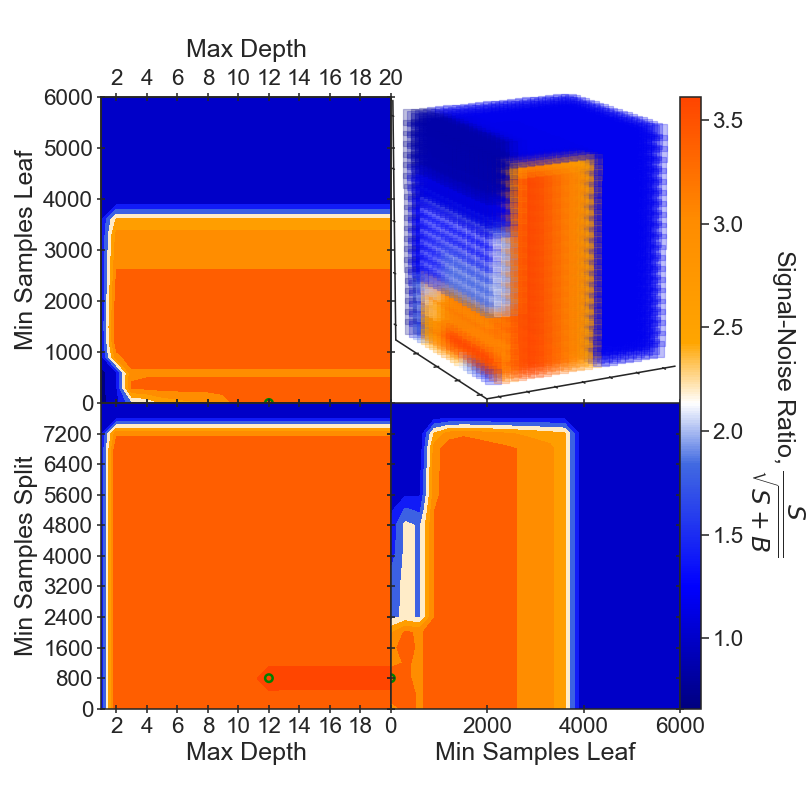

In [16]:
fig